# Î∂ÑÏÑùÎåÄÏÉÅ Îç∞Ïù¥ÌÑ∞

- ÏÑúÏö∏Ïãú ÏßÄÏó≠Íµ¨ Î≥Ñ Ïú†Ìï¥Ï†êÌè¨Ïàò Î∞è Ï≤≠ÏÜåÎÖÑ/Ï†ÑÏ≤¥ Î≤îÏ£Ñ Í±¥Ïàò
- ÏßÄÏó≠Íµ¨ Î≥Ñ ÏÑ±Ïù∏ 5ÎåÄ Î≤îÏ£Ñ Í±¥Ïàò: (ÏßÄÏó≠Íµ¨Î≥Ñ Ï†ÑÏ≤¥ 5ÎåÄ Î≤îÏ£Ñ Í±¥Ïàò) - (ÏßÄÏó≠Íµ¨Î≥Ñ Ï≤≠ÏÜåÎÖÑ 5ÎåÄ Î≤îÏ£Ñ Í±¥Ïàò)
- ÏßÄÏó≠Íµ¨ Î≥Ñ Ï≤≠ÏÜåÎÖÑ Î≤îÏ£Ñ Í±¥Ïàò Ìï©
- ÏßÄÏó≠Íµ¨ Î≥Ñ Ï†ÑÏ≤¥ Î≤îÏ£Ñ Í±¥Ïàò Ìï©
- ÏßÄÏó≠Íµ¨ Î≥Ñ ÏÑ±Ïù∏ 5ÎåÄ Î≤îÏ£Ñ Í±¥ÏàòÏóê ÎåÄÌïú Ï≤≠ÏÜåÎÖÑ 5ÎåÄ Î≤îÏ£Ñ Í±¥Ïàò ÎπÑÏú®: (ÏßÄÏó≠Íµ¨Î≥Ñ Ï≤≠ÏÜåÎÖÑ 5ÎåÄ Î≤îÏ£Ñ Í±¥Ïàò) / (ÏßÄÏó≠Íµ¨Î≥Ñ Ï†ÑÏ≤¥ 5ÎåÄ Î≤îÏ£Ñ Í±¥Ïàò)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
import itertools
%matplotlib inline

mpl.rc('font', family='AppleGothic')  # macOS Í∏∞Î≥∏ ÌïúÍ∏Ä ÏßÄÏõê Ìè∞Ìä∏
mpl.rcParams['axes.unicode_minus'] = False

data = pd.read_csv('nightlife_crime.csv')

data['robbery_adult'] = data['robbery_Tot'] - data['robbery']
data['forcible_rape_adult'] = data['forcible_rape_Tot'] - data['forcible_rape']
data['murder_adult'] = data['murder_tot'] - data['murder']
data['thef_adult'] = data['thef_tot'] - data['thef']
data['violence_adult'] = data['violence_Tot'] - data['violence']

data['crime_tot'] = data['murder_tot'] + data['robbery_Tot'] + data['forcible_rape_Tot'] + data['thef_tot'] + data['violence_Tot']
data['crime_youth_tot'] = data['murder'] + data['robbery'] + data['forcible_rape'] + data['thef'] + data['violence']
data['murder_ratio'] = data['murder'] / data['murder_tot']
data['robbery_ratio'] = data['robbery'] / data['robbery_Tot']
data['rape_ratio'] = data['forcible_rape'] / data['forcible_rape_Tot']
data['thef_ratio'] = data['thef'] / data['thef_tot']
data['violence_ratio'] = data['violence'] / data['violence_Tot']
data['total_youth_ratio'] = (data['murder'] + data['robbery'] + data['forcible_rape'] + data['thef'] + data['violence']) / \
                          (data['murder_tot'] + data['robbery_Tot'] + data['forcible_rape_Tot'] + data['thef_tot'] + data['violence_Tot'])
data['total_youth'] = data['murder'] + data['robbery'] + data['forcible_rape'] + data['thef'] + data['violence']
data['total_adult'] = data['crime_tot'] - data['crime_youth_tot']
data.head()

region  pub  karaoke  tot_nightlife  murder  robbery  forcible_rape  thef  \
0     Í∞ïÎÇ®  283      354            637       0        6             19   140   
1     Í∞ïÎèô  146      106            252       0        3              6   193   
2     Í∞ïÎ∂Å   79      128            207       0        0              9   166   
3     Í∞ïÏÑú  113      167            280       0        3              9   273   
4     Í¥ÄÏïÖ  223       99            322       0        2             14   170   

   violence  murder_tot  ...  crime_tot  crime_youth_tot  murder_ratio  \
0       176           3  ...       5422              341           0.0   
1       158           4  ...       5244              360           0.0   
2       210           7  ...       4257              385           0.0   
3       240           7  ...       5585              525           0.0   
4       209           9  ...       6345              395           0.0   

   robbery_ratio  rape_ratio  thef_ratio  violence_ratio  total_youth_ratio  \
0       0.285714    0.061290    0.056361        0.067588           0.062892   
1       0.500000    0.038462    0.081572        0.058260           0.068650   
2       0.000000    0.058824    0.115760        0.079275           0.090439   
3       0.230769    0.034351    0.130248        0.074836           0.094002   
4       0.166667    0.043750    0.062823        0.063372           0.062254   

   total_youth  total_adult  
0          341         5081  
1          360         4884  
2          385         3872  
3          525         5060  
4          395         5950  

[5 rows x 29 columns]

---

# Í∞ÄÏÑ§ 1 : ÏßÄÏó≠Íµ¨ Î≥Ñ Ïú†Ìù•ÏóÖÏàò Í±¥ÏàòÏóê Îî∞Î•∏ Ï≤≠ÏÜåÎÖÑ Î≤îÏ£Ñ Í±¥Ïàò ÎπÑÍµê


- Í∑ÄÎ¨¥Í∞ÄÏÑ§ H‚ÇÄ: Ïú†Ìù•ÏóÖÏÜå Ïàò ÏôÄ Ï≤≠ÏÜåÎÖÑÎ≤îÏ£Ñ Í±¥ÏàòÎäî ÏÉÅÍ¥ÄÏù¥ ÏóÜÎã§
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ H‚ÇÅ: Ïú†Ìù•ÏóÖÏÜå Ïàò ÏôÄ Ï≤≠ÏÜåÎÖÑÎ≤îÏ£Ñ Í±¥ÏàòÎäî ÏÉÅÍ¥ÄÏù¥ ÏûàÎã§

## ÎπÑÍµê ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌïú Ïù∏ÏûêÍ∞Ñ ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏

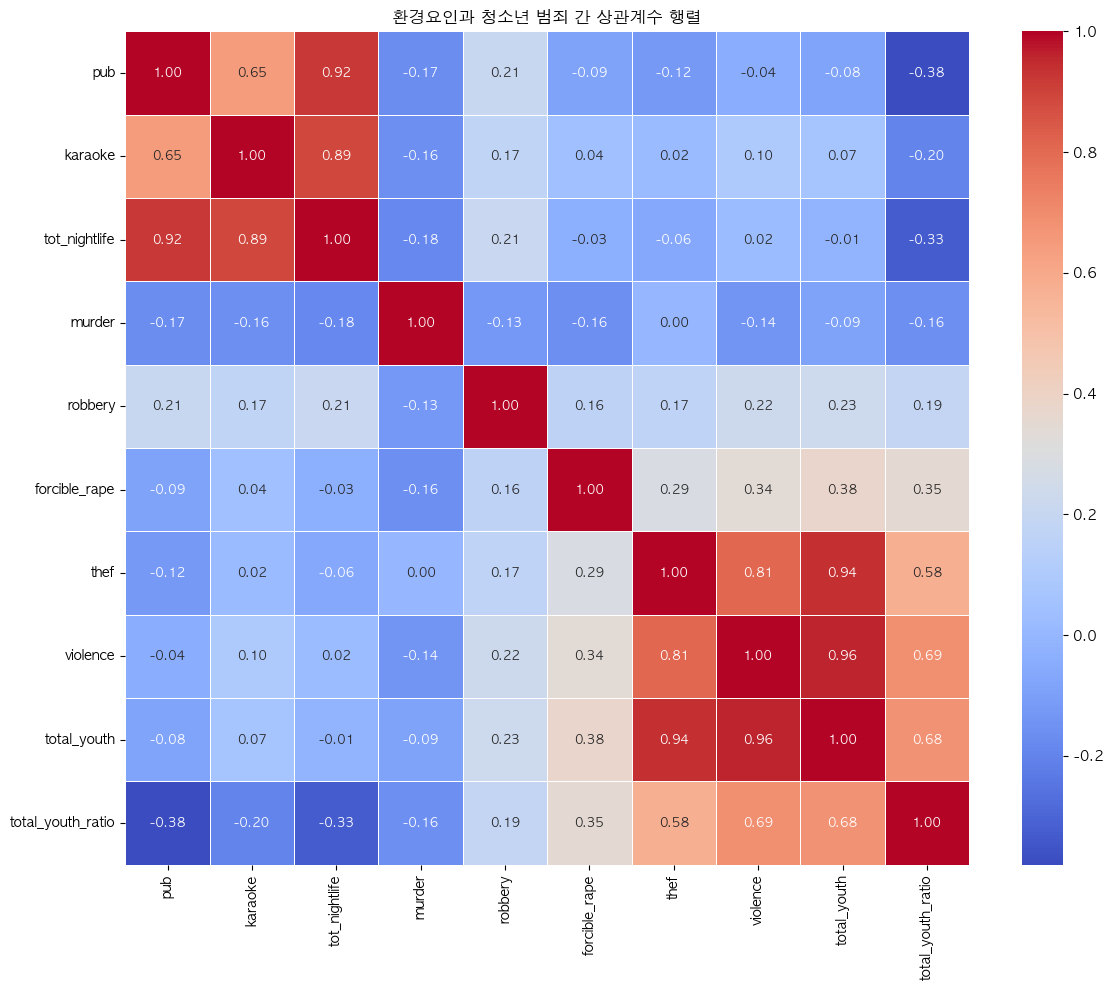

In [7]:
# ÌûàÌä∏Îßµ Î∂ÑÏÑù

correlation_vars = ['pub', 'karaoke', 'tot_nightlife', 
                  'murder', 'robbery', 'forcible_rape', 'thef', 'violence',
                  'total_youth', 'total_youth_ratio']
corr_matrix = data[correlation_vars].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
           linewidths=0.5, annot_kws={'size':9})
plt.title('ÌôòÍ≤ΩÏöîÏù∏Í≥º Ï≤≠ÏÜåÎÖÑ Î≤îÏ£Ñ Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨')
plt.tight_layout()
plt.show()

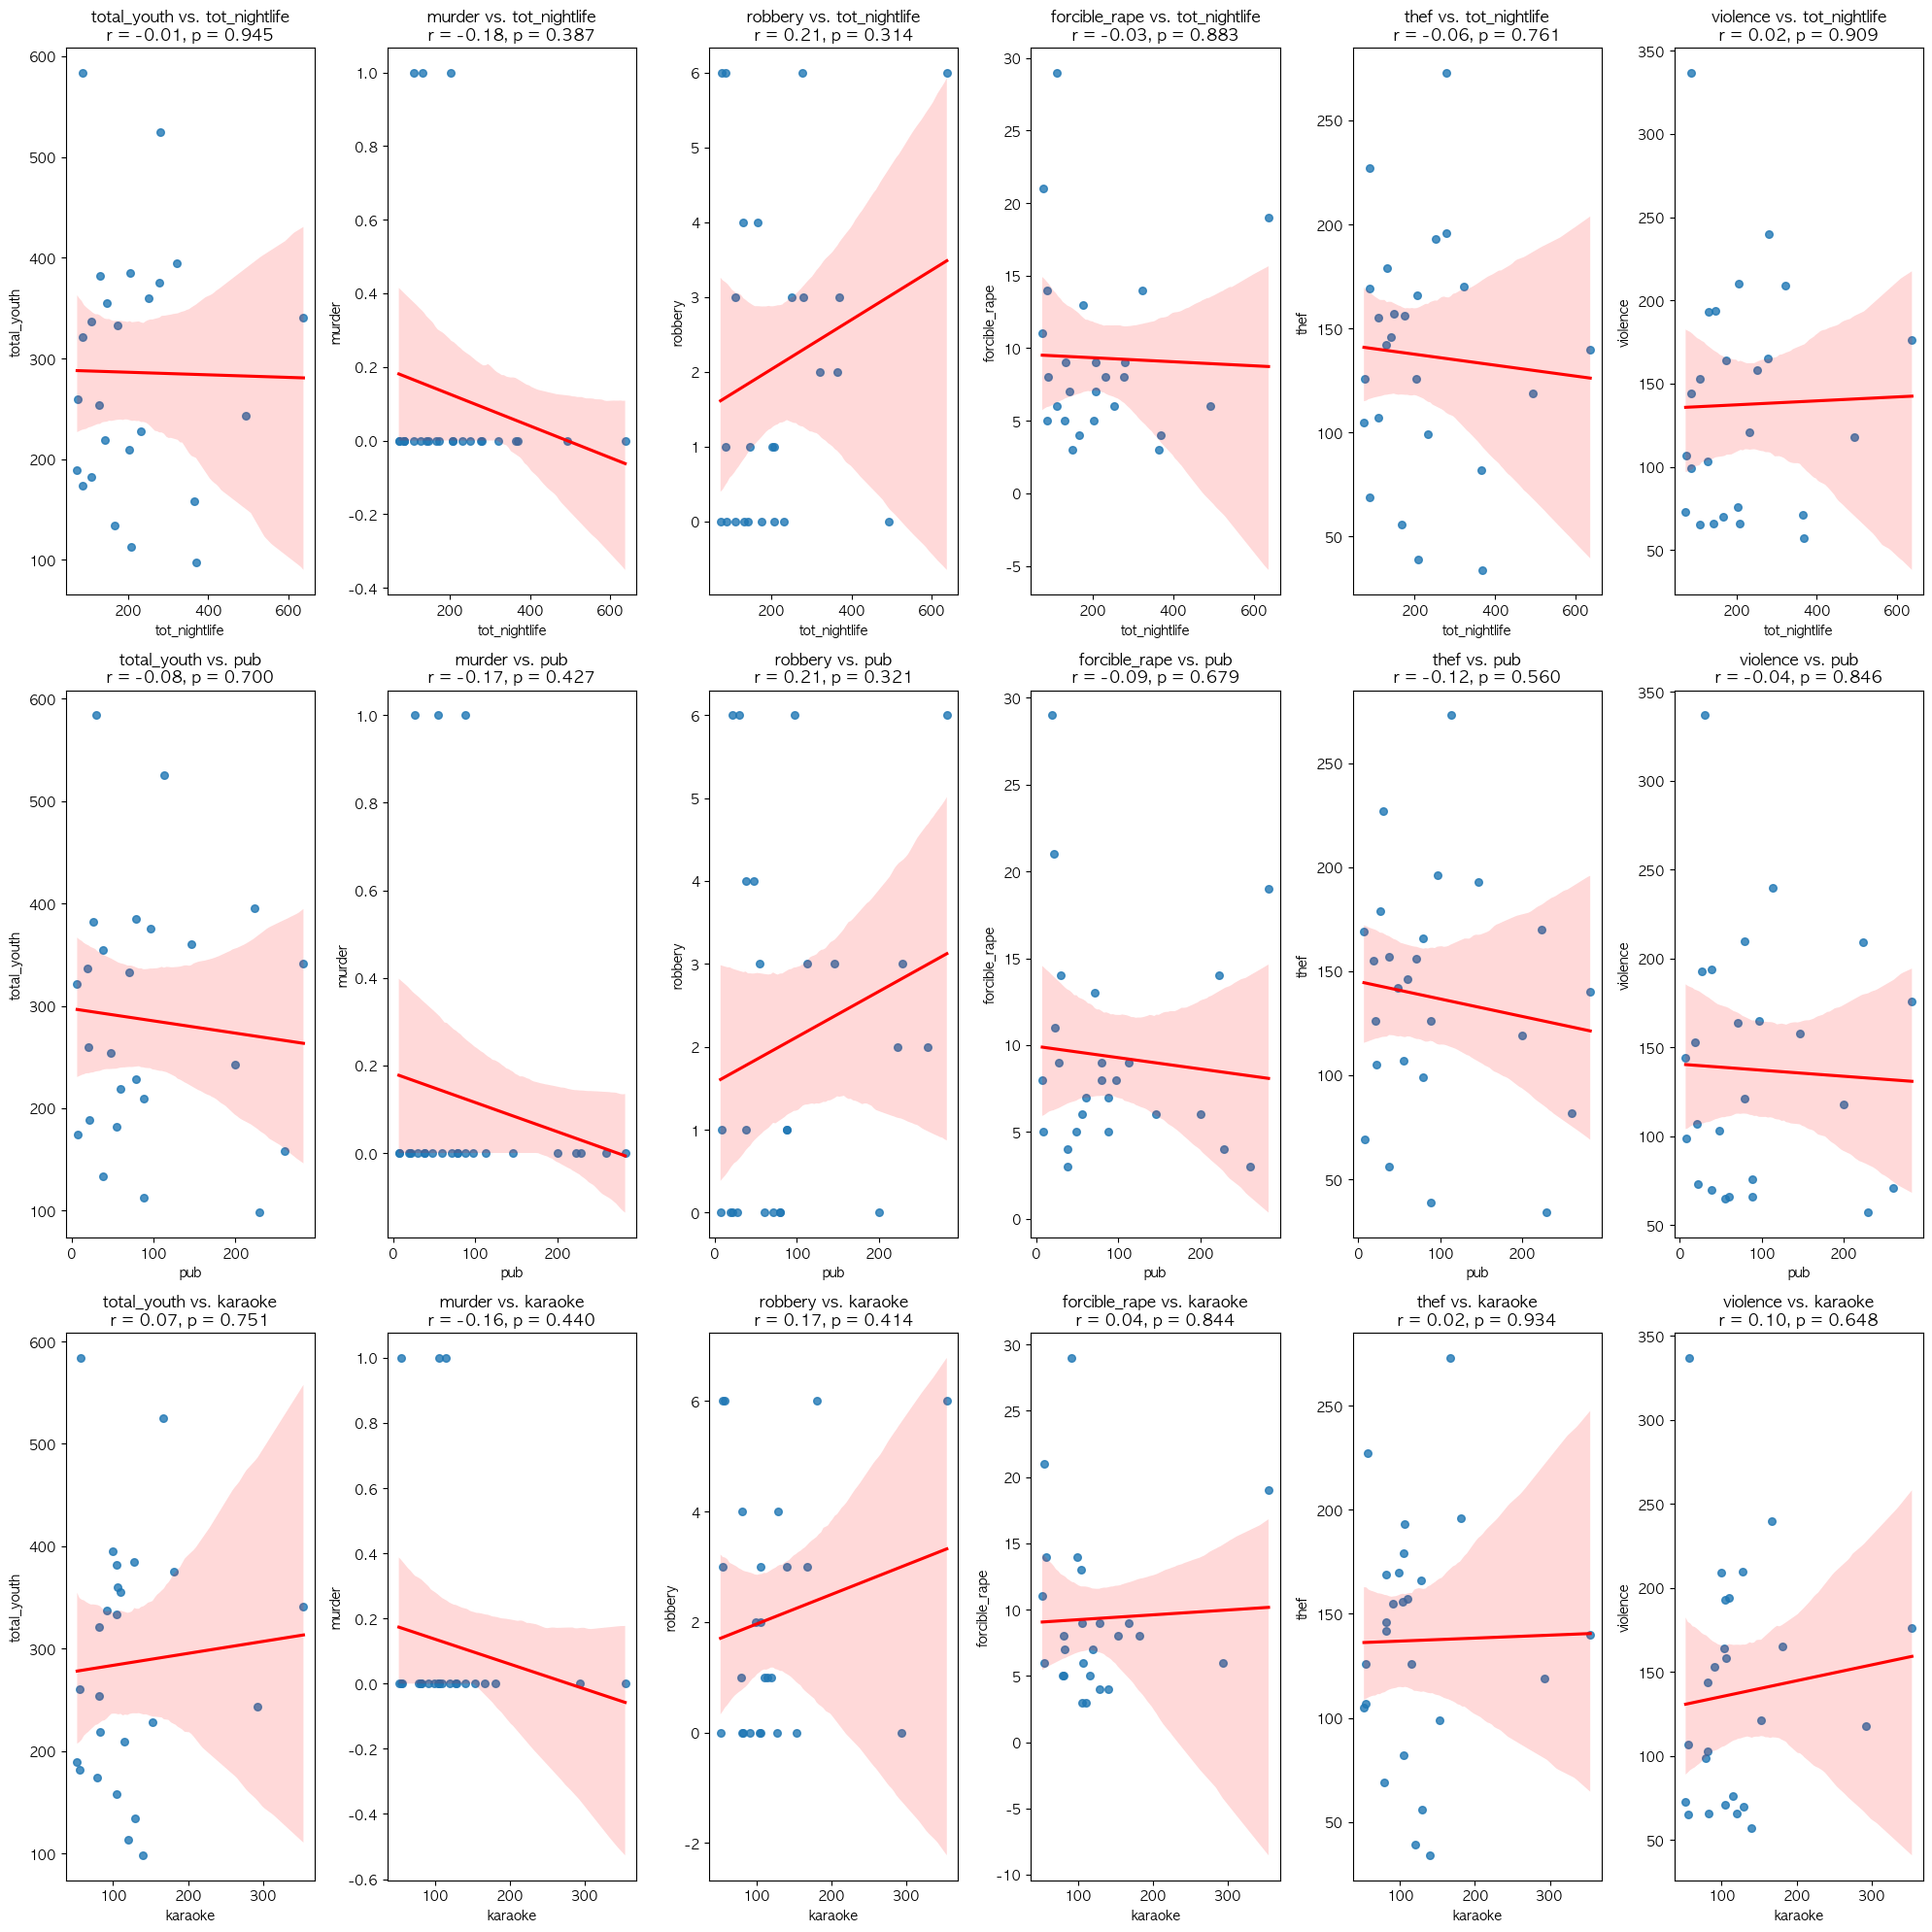


üìä ÏÉÅÍ¥ÄÎ∂ÑÏÑù Í≤∞Í≥º:

       X Variable     Y Variable  Pearson r  p-value
0   tot_nightlife    total_youth     -0.015   0.9449
1   tot_nightlife         murder     -0.181   0.3871
2   tot_nightlife        robbery      0.210   0.3143
3   tot_nightlife  forcible_rape     -0.031   0.8826
4   tot_nightlife           thef     -0.064   0.7609
5   tot_nightlife       violence      0.024   0.9094
6             pub    total_youth     -0.081   0.7002
7             pub         murder     -0.166   0.4270
8             pub        robbery      0.207   0.3209
9             pub  forcible_rape     -0.087   0.6786
10            pub           thef     -0.122   0.5604
11            pub       violence     -0.041   0.8457
12        karaoke    total_youth      0.067   0.7507
13        karaoke         murder     -0.162   0.4405
14        karaoke        robbery      0.171   0.4143
15        karaoke  forcible_rape      0.041   0.8443
16        karaoke           thef      0.018   0.9335
17        karaoke 

In [8]:
# ÏÇ∞Ï†êÎèÑ Î∞è ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌôïÏù∏
import pandas as pd
from scipy.stats import pearsonr
import itertools

# 3. Î∂ÑÏÑùÌï† Î≥ÄÏàò Î™©Î°ù Ï†ïÏùò
x_vars = ['tot_nightlife', 'pub', 'karaoke']
y_vars = ['total_youth', 'murder', 'robbery', 'forcible_rape', 'thef', 'violence']

# 4. ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞ Í≤∞Í≥º Ï†ÄÏû•
correlation_results = []

# 5. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(20, 20))
plot_idx = 1

for x, y in itertools.product(x_vars, y_vars):
    r, p = pearsonr(data[x], data[y])
    correlation_results.append({
        'X Variable': x,
        'Y Variable': y,
        'Pearson r': round(r, 3),
        'p-value': round(p, 4)
    })

    # ÌöåÍ∑ÄÏÑ† Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
    plt.subplot(len(x_vars), len(y_vars), plot_idx)
    sns.regplot(x=x, y=y, data=data, scatter_kws={'s': 30}, line_kws={'color': 'red'})
    plt.title(f'{y} vs. {x}\nr = {r:.2f}, p = {p:.3f}')
    plt.xlabel(x)
    plt.ylabel(y)
    plot_idx += 1

plt.tight_layout()
plt.savefig('image/figure07.png')
plt.show()


# 6. ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≤∞Í≥º Ï∂úÎ†•
correlation_df = pd.DataFrame(correlation_results)
print("\nüìä ÏÉÅÍ¥ÄÎ∂ÑÏÑù Í≤∞Í≥º:\n")
print(correlation_df)

| X Variable     | Y Variable     | Pearson r | p-value | Ìï¥ÏÑù                     |
|----------------|----------------|-----------|---------|--------------------------|
| tot_nightlife  | total_youth    | -0.015    | 0.9449  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| tot_nightlife  | murder         | -0.181    | 0.3871  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| tot_nightlife  | robbery        | 0.210     | 0.3143  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| tot_nightlife  | forcible_rape  | -0.031    | 0.8826  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| tot_nightlife  | thef           | -0.064    | 0.7609  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| tot_nightlife  | violence       | 0.024     | 0.9094  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| pub            | total_youth    | -0.081    | 0.7002  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| pub            | murder         | -0.166    | 0.4270  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| pub            | robbery        | 0.207     | 0.3209  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| pub            | forcible_rape  | -0.087    | 0.6786  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| pub            | thef           | -0.122    | 0.5604  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| pub            | violence       | -0.041    | 0.8457  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| karaoke        | total_youth    | 0.067     | 0.7507  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| karaoke        | murder         | -0.162    | 0.4405  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| karaoke        | robbery        | 0.171     | 0.4143  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| karaoke        | forcible_rape  | 0.041     | 0.8443  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| karaoke        | thef           | 0.018     | 0.9335  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| karaoke        | violence       | 0.096     | 0.6483  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |

**Í≤∞Î°†**
- Ïú†Ìù•ÏóÖÏÜå ÏàòÍ∞Ä Ï≤≠ÏÜåÎÖÑ Î≤îÏ£Ñ Í±¥ÏàòÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÏùå(p-value > 0.05)
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ H‚ÇÄ "Ïú†Ìù•ÏóÖÏÜå Ïàò ÏôÄ Ï≤≠ÏÜåÎÖÑÎ≤îÏ£Ñ Í±¥ÏàòÎäî ÏÉÅÍ¥ÄÏù¥ ÏóÜÎã§" Í∏∞Í∞Å Î∂àÍ∞Ä

## ÌöåÍ∑ÄÎ∂ÑÏÑù

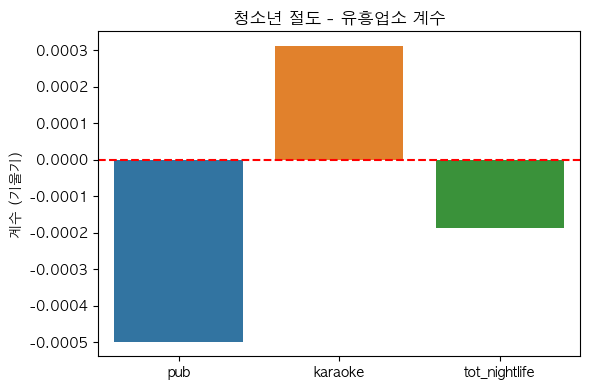

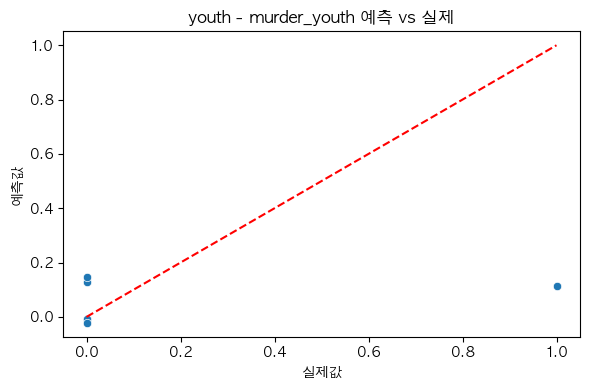

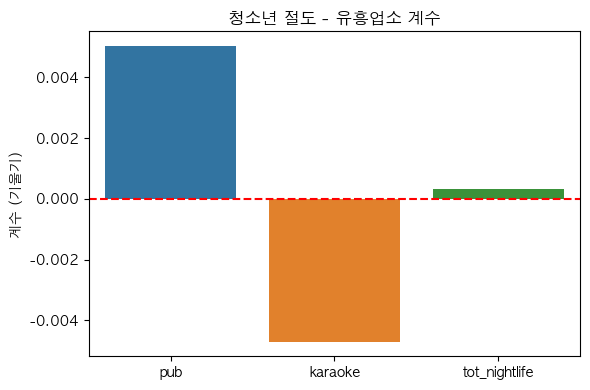

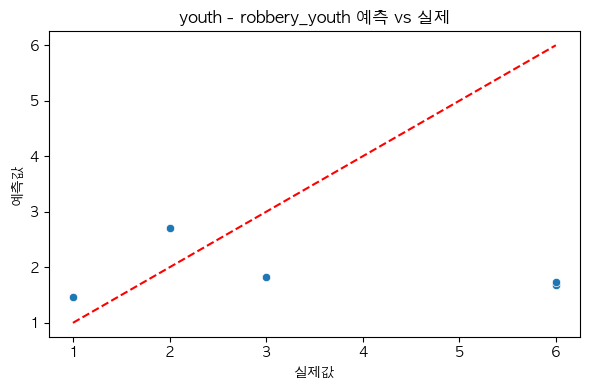

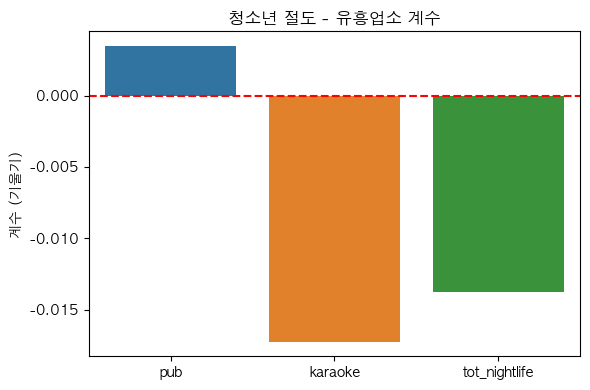

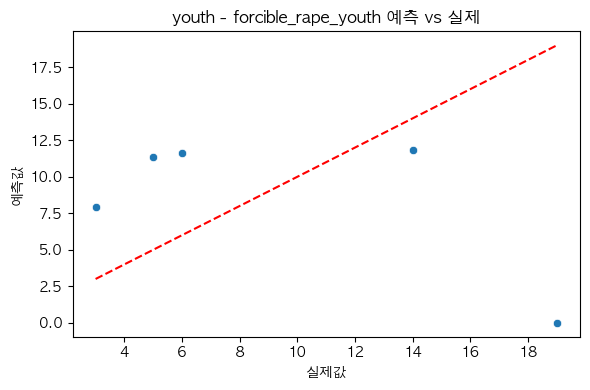

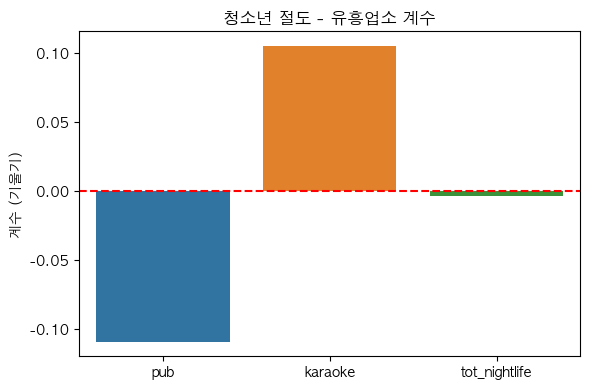

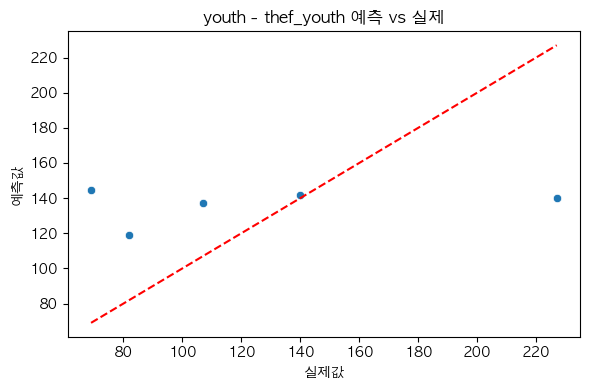

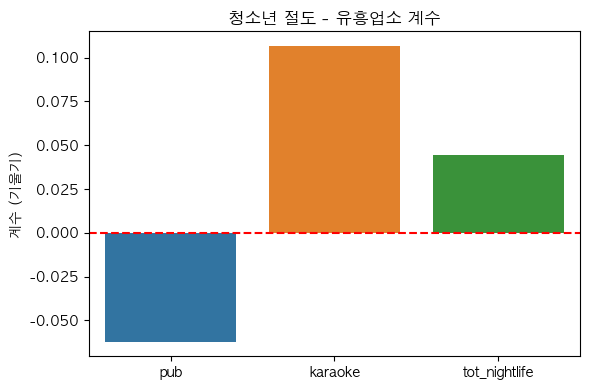

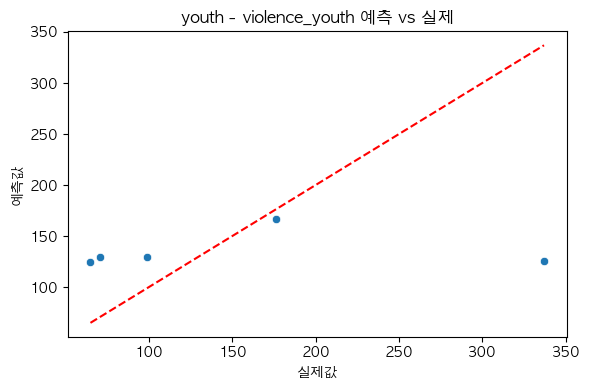

   Group               Target  Train R¬≤  Test R¬≤  \
0  youth         murder_youth    0.0193  -0.0340   
1  youth        robbery_youth    0.0215  -0.8348   
2  youth  forcible_rape_youth    0.1144  -1.4954   
3  youth           thef_youth    0.0128   0.0224   
4  youth       violence_youth    0.0170  -0.0172   

                                        Coefficients   Intercept  
0  {'pub': -0.0004983639802798519, 'karaoke': 0.0...    0.142947  
1  {'pub': 0.005031730448575187, 'karaoke': -0.00...    1.767759  
2  {'pub': 0.00346141838518894, 'karaoke': -0.017...   13.876542  
3  {'pub': -0.10885753204913369, 'karaoke': 0.105...  137.692636  
4  {'pub': -0.062001284679716544, 'karaoke': 0.10...  117.746864  


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
def run_multiple_regression(target_cols, X_df, Y_df, group_name="group"):
    """
    Îã§Ï§ë ÌöåÍ∑Ä Î∂ÑÏÑù: Ïú†Ìù•ÏóÖÏÜå ÏàòÎ°ú Î≤îÏ£Ñ ÏòàÏ∏°
    """
    results = []
    X = X_df[['pub', 'karaoke', 'tot_nightlife']]
    for y_col in target_cols:
        y = Y_df[y_col]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression().fit(X_train, y_train)
        plot_coefficients(model, X_train.columns, "Ï≤≠ÏÜåÎÖÑ Ï†àÎèÑ - Ïú†Ìù•ÏóÖÏÜå Í≥ÑÏàò")
        r2_train = model.score(X_train, y_train)
        r2_test = model.score(X_test, y_test)
        results.append({
            'Group': group_name,
            'Target': y_col,
            'Train R¬≤': round(r2_train, 4),
            'Test R¬≤': round(r2_test, 4),
            'Coefficients': dict(zip(X.columns, model.coef_)),
            'Intercept': model.intercept_
        })
        # Îã§Ï§ë ÌöåÍ∑Ä ÎÇ¥Î∂ÄÏóê Ï∂îÍ∞Ä
        plot_predictions(model, X_test, y_test, title=f"{group_name} - {y_col} ÏòàÏ∏° vs Ïã§Ï†ú")
    return pd.DataFrame(results)
def plot_predictions(model, X_test, y_test, title="ÏòàÏ∏° vs Ïã§Ï†ú"):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    plt.xlabel("Ïã§Ï†úÍ∞í")
    plt.ylabel("ÏòàÏ∏°Í∞í")
    plt.title(title)
    plt.tight_layout()
    plt.show()
def plot_coefficients(model, feature_names, title="ÌöåÍ∑ÄÍ≥ÑÏàò ÏãúÍ∞ÅÌôî"):
    coef = model.coef_
    plt.figure(figsize=(6, 4))
    sns.barplot(x=feature_names, y=coef)
    plt.title(title)
    plt.ylabel("Í≥ÑÏàò (Í∏∞Ïö∏Í∏∞)")
    plt.axhline(0, color='red', linestyle='--')
    plt.tight_layout()
    plt.show()

youth_cols = ['murder_youth', 'robbery_youth', 'forcible_rape_youth', 'thef_youth', 'violence_youth']

youth_results = run_multiple_regression(youth_cols, data, groups_df, group_name="youth")

# Í≤∞Í≥º Î≥¥Í∏∞
print(youth_results)




**Í≤∞Î°†**


| Target             | Train R¬≤ | Test R¬≤  |
|--------------------|----------|----------|
| murder_youth       | 0.0193   | -0.0340  | 
| robbery_youth      | 0.0215   | -0.8348  | 
| forcible_rape_youth| 0.1144   | -1.4954  | 
| thef_youth         | 0.0128   | 0.0224   | 
| violence_youth     | 0.0170   | -0.0172  | 

ÏßÄÏó≠Íµ¨Î≥Ñ Ïú†Ìù•ÏóÖÏÜå Ï†êÌè¨ ÏàòÏóê Îî∞Î•∏ Ï≤≠ÏÜåÎÖÑ Î≤îÏ£Ñ ÏòàÏ∏°ÏùÑ Ìï† Ïàò ÏóÜÎã§.

---

# Í∞ÄÏÑ§ 2 : ÏßÄÏó≠Íµ¨ Î≥Ñ ÏÑ±Ïù∏ Î≤îÏ£Ñ Í±¥ÏàòÏóê Îî∞Î•∏ Ï≤≠ÏÜåÎÖÑ Î≤îÏ£Ñ Í±¥Ïàò ÎπÑÍµê


- Í∑ÄÎ¨¥Í∞ÄÏÑ§ H‚ÇÄ: ÏÑ±Ïù∏ Î≤îÏ£Ñ Í±¥Ïàò ÏôÄ Ï≤≠ÏÜåÎÖÑÎ≤îÏ£Ñ Í±¥ÏàòÎäî ÏÉÅÍ¥ÄÏù¥ ÏóÜÎã§
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ H‚ÇÅ: ÏÑ±Ïù∏ Î≤îÏ£Ñ Í±¥Ïàò ÏôÄ Ï≤≠ÏÜåÎÖÑÎ≤îÏ£Ñ Í±¥ÏàòÎäî ÏÉÅÍ¥ÄÏù¥ ÏûàÎã§

## ÎπÑÍµê ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌïú Ïù∏ÏûêÍ∞Ñ ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏

> pearson r > 0.7 Ïù∏ Î≥ÄÏàòÍ∞Ñ Ï°∞Ìï©Îßå Ï∂úÎ†•

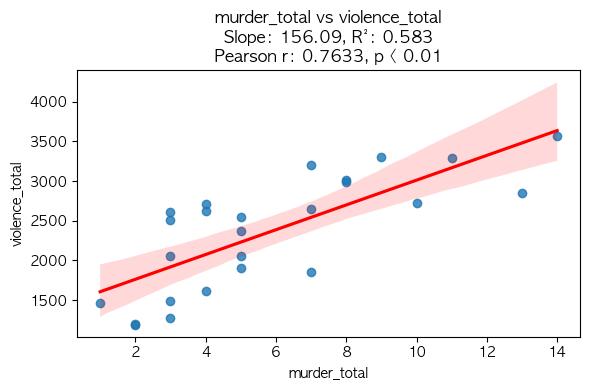

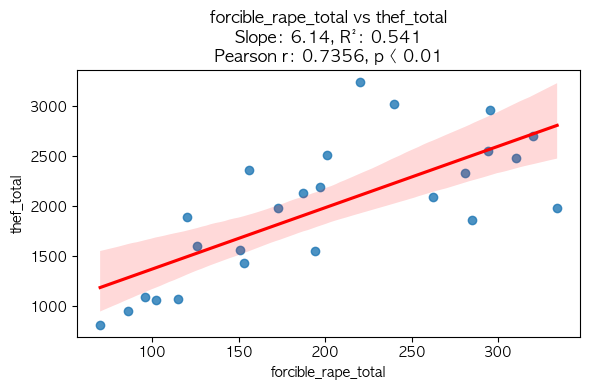

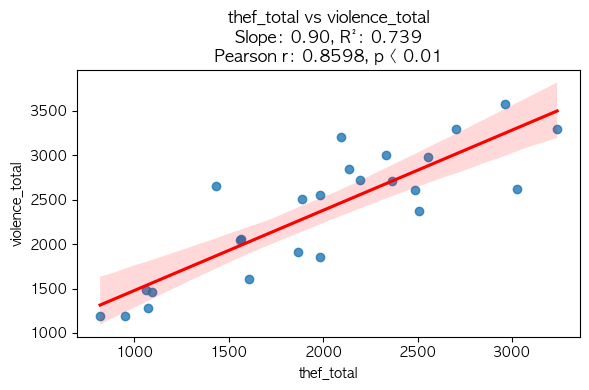

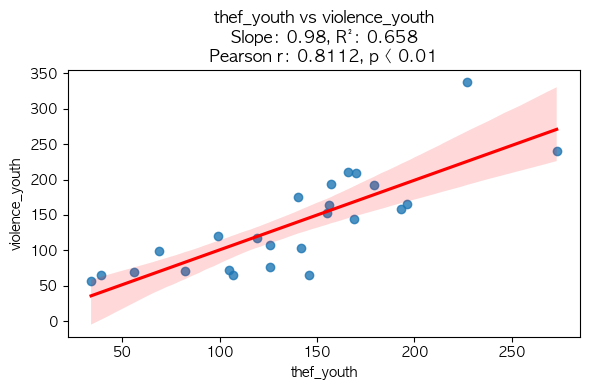

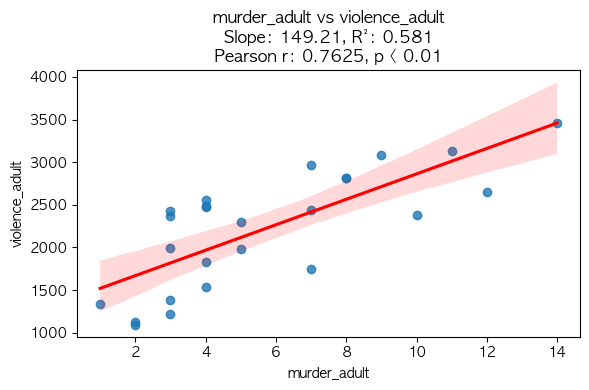

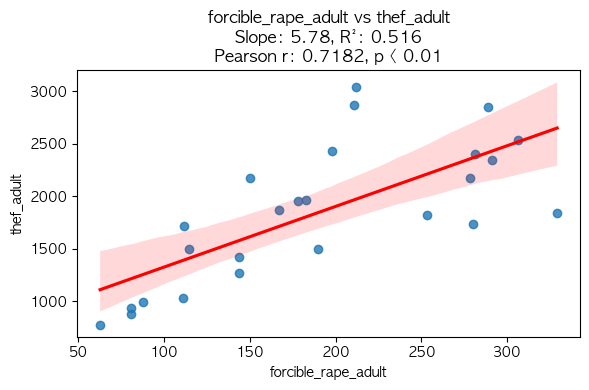

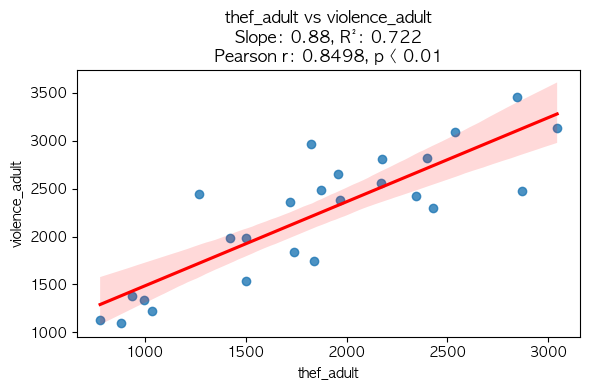

In [17]:
# 1. Ï≤≠ÏÜåÎÖÑ, ÏÑ±Ïù∏, Ï†ÑÏ≤¥ Î≤îÏ£Ñ Ïª¨ÎüºÎßå Ï∂îÏ∂úÌï¥ÏÑú ÏÉàÎ°úÏö¥ DataFrame ÎßåÎì§Í∏∞ (ÏõêÎ≥∏ dataÎäî Ïú†ÏßÄ)
groups_df = data[[
    'murder', 'robbery', 'forcible_rape', 'thef', 'violence',
    'murder_adult', 'robbery_adult', 'forcible_rape_adult', 'thef_adult', 'violence_adult',
    'murder_tot', 'robbery_Tot', 'forcible_rape_Tot', 'thef_tot', 'violence_Tot'
]].copy()

# 2. Î≥¥Í∏∞ Ï¢ãÍ≤å Ïª¨Îüº Ïù¥Î¶Ñ Î∞îÍæ∏Í∏∞
groups_df.columns = [
    'murder_youth', 'robbery_youth', 'forcible_rape_youth', 'thef_youth', 'violence_youth',
    'murder_adult', 'robbery_adult', 'forcible_rape_adult', 'thef_adult', 'violence_adult',
    'murder_total', 'robbery_total', 'forcible_rape_total', 'thef_total', 'violence_total'
]

crime_groups_df = groups_df[[
    'murder_youth', 'robbery_youth', 'forcible_rape_youth', 'thef_youth', 'violence_youth',
    'murder_adult', 'robbery_adult', 'forcible_rape_adult', 'thef_adult', 'violence_adult'
]].copy()

crime_groups_total_df = groups_df[[
    'murder_total', 'robbery_total', 'forcible_rape_total', 'thef_total', 'violence_total'
]].copy()

crime_total_df = data[['total_youth', 'total_adult']].copy()



# # 3. ÌôïÏù∏Ïö© Ï∂úÎ†•
# crime_groups_df.head()

import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr


crime_list = [crime_groups_total_df, crime_groups_df, crime_total_df]

# Ï†ÄÏû•Ìï† Ìè¥Îçî ÏÉùÏÑ±
save_dir = "regression_plots"
os.makedirs(save_dir, exist_ok=True)


for i in range(3):
    df_i = crime_list[i]

    # ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∏∞Ï§Ä
    threshold = 0.7
    corr_matrix = df_i.corr()
    filtered_corr = corr_matrix[(abs(corr_matrix) >= threshold) & (corr_matrix != 1.0)]

    # Ïåç Ï∂îÏ∂ú Î∞è Ï†ïÎ¶¨
    pairs = (
        filtered_corr.stack()
        .reset_index()
        .rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: "Correlation"})
    )
    pairs['pair'] = pairs.apply(lambda row: tuple(sorted([row['Feature 1'], row['Feature 2']])), axis=1)
    pairs = pairs.drop_duplicates(subset='pair').drop(columns='pair')

    # Í∞Å ÏåçÏóê ÎåÄÌï¥ ÌöåÍ∑Ä + ÏÉÅÍ¥ÄÎ∂ÑÏÑù + Í∑∏ÎûòÌîÑ Ï†ÄÏû•
    for index, row in pairs.iterrows():
        x_col, y_col = row['Feature 1'], row['Feature 2']
        X = df_i[[x_col]].values
        y = df_i[y_col].values

        # ÌöåÍ∑Ä Î∂ÑÏÑù
        model = LinearRegression()
        model.fit(X, y)
        slope = model.coef_[0]
        intercept = model.intercept_
        r_squared = model.score(X, y)

        # Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò
        corr_coef, p_value = pearsonr(df_i[x_col], df_i[y_col])

        # ÏãúÍ∞ÅÌôî
        plt.figure(figsize=(6, 4))
        sns.regplot(x=x_col, y=y_col, data=df_i, line_kws={"color": "red"})
        # p-value Ï∂úÎ†• Ìè¨Îß∑ Ï≤òÎ¶¨
        p_text = "p < 0.01" if p_value < 0.01 else f"p = {p_value:.8f}"

        # Í∑∏ÎûòÌîÑ ÌÉÄÏù¥ÌãÄ
        plt.title(f"{x_col} vs {y_col}\n"
          f"Slope: {slope:.2f}, R¬≤: {r_squared:.3f}\n"
          f"Pearson r: {corr_coef:.4f}, {p_text}")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.tight_layout()
        plt.show()

        # Ï†ÄÏû•
        filename = f"{x_col}_vs_{y_col}.png".replace("/", "_")
        save_path = os.path.join(save_dir, filename)
        plt.savefig(save_path)
        plt.close()


**Í≤∞Î°†**

- ÏÑ±Ïù∏ Î≤îÏ£Ñ Í±¥ÏàòÍ∞Ä Ï≤≠ÏÜåÎÖÑ Î≤îÏ£Ñ Í±¥ÏàòÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏóÜÏùå (p-value > 0.05)
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ H‚ÇÄ "ÏÑ±Ïù∏ Î≤îÏ£Ñ Í±¥Ïàò ÏôÄ Ï≤≠ÏÜåÎÖÑÎ≤îÏ£Ñ Í±¥ÏàòÎäî ÏÉÅÍ¥ÄÏù¥ ÏóÜÎã§" Í∏∞Í∞Å Î∂àÍ∞Ä